<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [3]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

Основні числові характеристики числових ознак:
           pclass         age       sibsp       parch        fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

Основні характеристики категоріальних ознак:

sex:
sex
male      577
female    314
Name: count, dtype: int64

embarked:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Кількість викидів у кожній числовій ознаці:
pclass      0
age        11
sibsp      46
parch     213
fare      116
dtype: int64


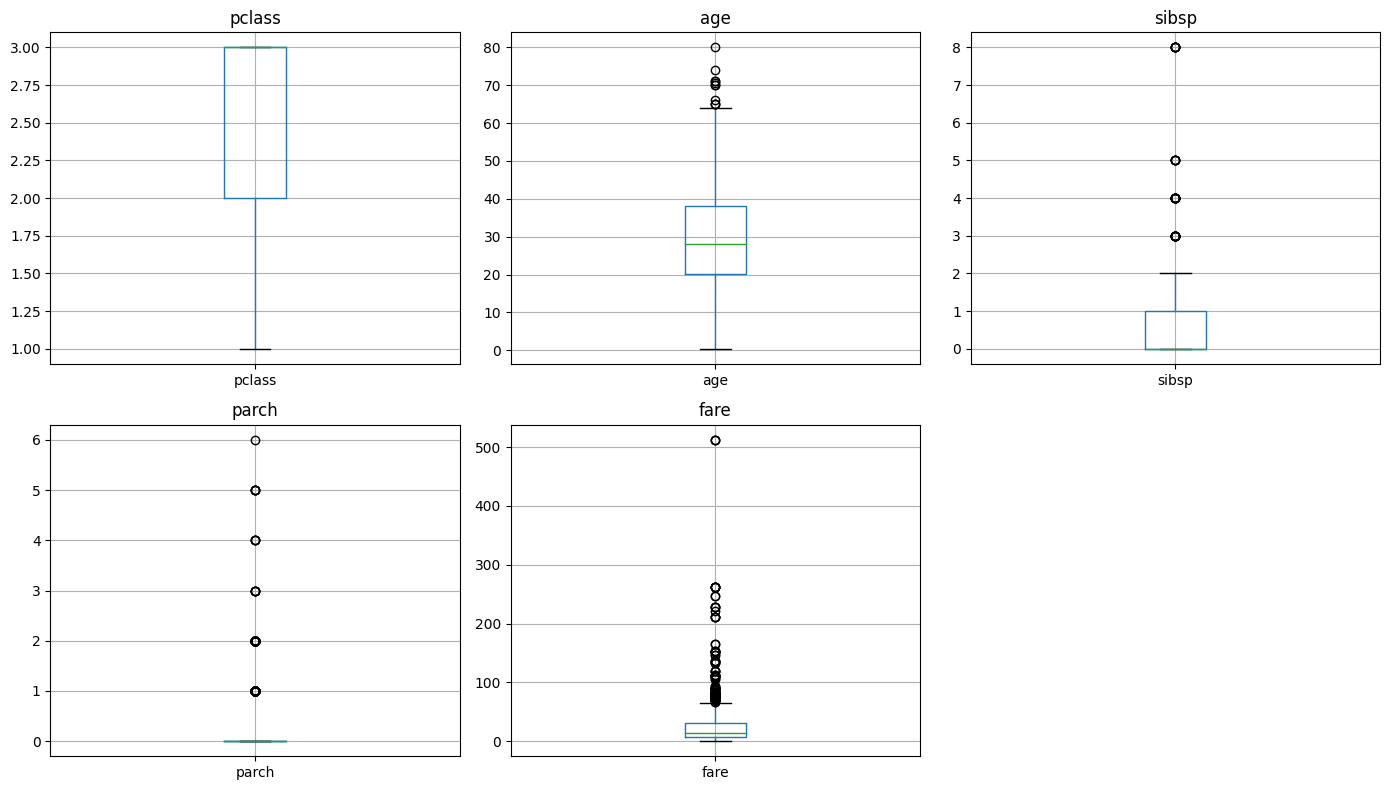

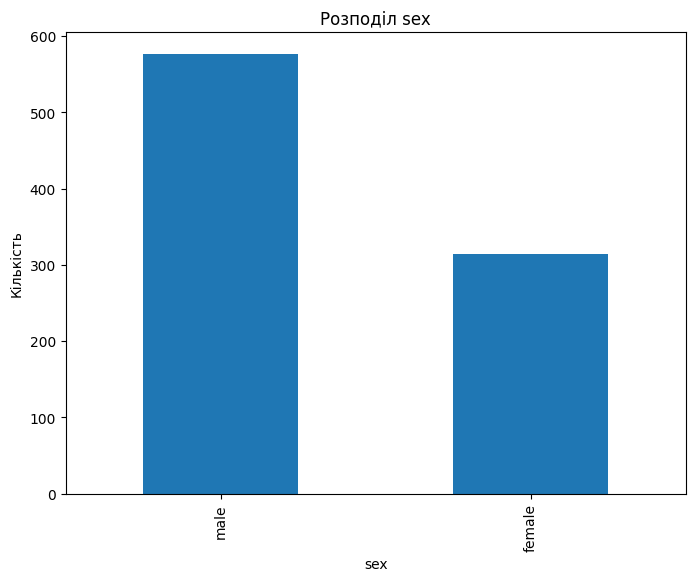

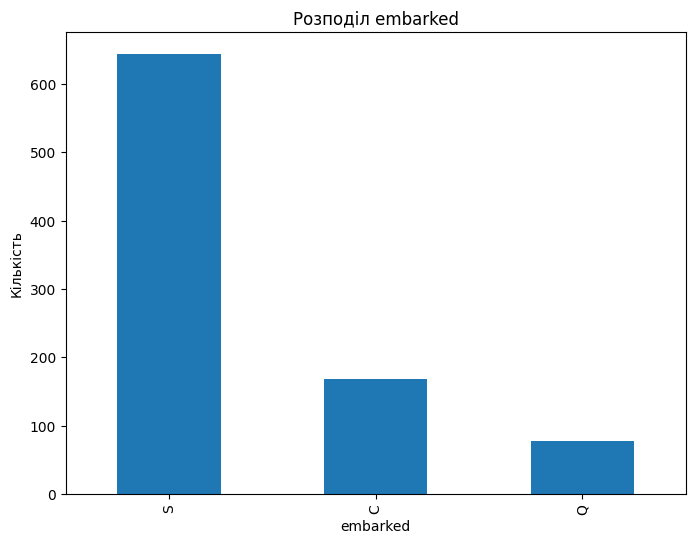


Висновки та коментарі:

1. Аналіз числових ознак:
    - Вік пасажирів варіюється від 0.42 до 80 років.
    - Тарифи (fare) мають широкий діапазон значень від 0 до 512.33, що свідчить про різні класи пасажирів.
    - Кількість братів/сестер/подружжя (sibsp) та кількість батьків/дітей (parch) в більшості випадків рівні 0.

2. Аналіз категоріальних ознак:
    - Більшість пасажирів подорожували у 3 класі.
    - Статевий розподіл приблизно рівномірний, з невеликою перевагою чоловіків.
    - Найчастіше пасажири сідали на борт у порту S (Southampton).

3. Перевірка наявності викидів:
    - Виявлено значну кількість викидів у тарифах (fare), що очікувано, оскільки тарифи сильно варіюються залежно від класу та інших факторів.
    - Вік також має деяку кількість викидів, але це можуть бути реальні значення для деяких пасажирів старшого віку.

4. Коментарі:
    - Дані мають певні викиди, особливо у тарифах, які можуть потребувати додаткового аналізу.
    - Вік деяких пасажирів відсутній (NaN), і

In [5]:
numerical_features = df.select_dtypes(include=[np.number])

print("Основні числові характеристики числових ознак:")
print(numerical_features.describe())

categorical_features = df.select_dtypes(exclude=[np.number])

print("\nОсновні характеристики категоріальних ознак:")
for column in categorical_features.columns:
    print(f"\n{column}:\n{categorical_features[column].value_counts()}")

Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).sum()
print("\nКількість викидів у кожній числовій ознаці:")
print(outliers)

plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=column)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

for column in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Кількість')
    plt.show()

print("\nВисновки та коментарі:")
print("""
1. Аналіз числових ознак:
    - Вік пасажирів варіюється від 0.42 до 80 років.
    - Тарифи (fare) мають широкий діапазон значень від 0 до 512.33, що свідчить про різні класи пасажирів.
    - Кількість братів/сестер/подружжя (sibsp) та кількість батьків/дітей (parch) в більшості випадків рівні 0.

2. Аналіз категоріальних ознак:
    - Більшість пасажирів подорожували у 3 класі.
    - Статевий розподіл приблизно рівномірний, з невеликою перевагою чоловіків.
    - Найчастіше пасажири сідали на борт у порту S (Southampton).

3. Перевірка наявності викидів:
    - Виявлено значну кількість викидів у тарифах (fare), що очікувано, оскільки тарифи сильно варіюються залежно від класу та інших факторів.
    - Вік також має деяку кількість викидів, але це можуть бути реальні значення для деяких пасажирів старшого віку.

4. Коментарі:
    - Дані мають певні викиди, особливо у тарифах, які можуть потребувати додаткового аналізу.
    - Вік деяких пасажирів відсутній (NaN), і його можна було б імпутувати або аналізувати окремо.
    - Категоріальні ознаки показують, що більшість пасажирів подорожували у 3 класі, і більшість посадок були з порту Southampton.
    - Для глибшого аналізу, можливо, знадобиться більше даних, наприклад, про виживання пасажирів, щоб зробити висновки щодо впливу різних ознак на виживання.
""")